In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np



# Context

In [2]:
pd.set_option('display.max_rows', 20)
train = pd.read_csv('train.csv')
train_copy = train.copy

# Data quality assessment

In [3]:
#Cамый младший
trains_min = train.sort_values(by = ['Age'], ascending=(True)).head(1)['Age'].values.tolist()
print(trains_min)

[0.08]


In [4]:
#самый старший
trains_max = train.sort_values(by = ['Age'], ascending=(False)).head(1)['Age'].values.tolist()
print(trains_max)

[87.0]


<AxesSubplot:>

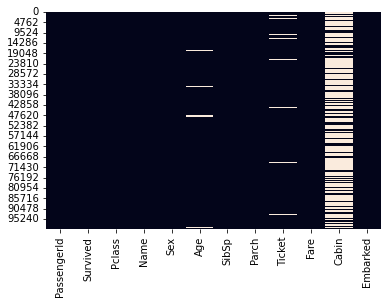

In [5]:

#Количество пропущенных значений граф
train.isnull().sum()
sns.heatmap(train.isnull(), cbar = False)

In [6]:
#Количество уникальных значений
train.nunique()

PassengerId    100000
Survived            2
Pclass              3
Name            92144
Sex                 2
Age               173
SibSp               7
Parch               8
Ticket          75331
Fare            15935
Cabin           26992
Embarked            3
dtype: int64

In [7]:
#найдем моду столбца Embarked и подставим ее в отсутствующие значения.
train.Embarked.fillna(train.Embarked.mode()[0], inplace = True)

#все отсутствующие данные выделяем в отдельный класс
train.Cabin = train.Cabin.fillna('NA')

#в возрасте много пропущенных значений. 
#Классифицируем на основе имени
train['Salutation'] = train.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())

#группируем по Sex и PClass.
grp = train.groupby(['Sex', 'Pclass'])

#Подставляем медиану группы
grp.Age.apply(lambda x: x.fillna(x.median()))
train.Age.fillna(train.Age.median(), inplace = True)

In [8]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Salutation
0,0,1,1,"Oconnor, Frankie",male,39.00,2,0,209245,27.14,C12239,S,Frankie
1,1,0,3,"Bryan, Drew",male,39.00,0,0,27323,13.35,NA,S,Drew
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NA,S,Kenneth
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NA,S,James
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NA,S,Michael
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,1,2,"Bell, Adele",female,62.00,0,0,PC 15008,14.86,D17243,C,Adele
99996,99996,0,2,"Brown, Herman",male,66.00,0,0,13273,11.15,NA,S,Herman
99997,99997,0,3,"Childress, Charles",male,37.00,0,0,NaN,9.95,NA,S,Charles
99998,99998,0,3,"Caughlin, Thomas",male,51.00,0,1,458654,30.92,NA,S,Thomas


# Data exploration

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

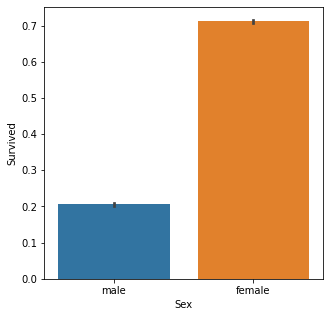

In [9]:
#train = train.groupby('Sex').size().sort_values(ascending = False).reset_index()
#train.columns = ['Sex','Survived']

#кол-во выживших в зависимости от пола
fig, ax = plt.subplots(figsize=(5,5))
plt.xticks(rotation=0)
sns.barplot(x='Sex', y='Survived',data=train)


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

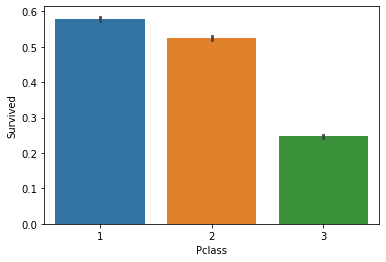

In [10]:
#Выжившие исходя из класса в котором плыли
sns.barplot(x = 'Pclass', y = 'Survived', data=train)

<AxesSubplot:>

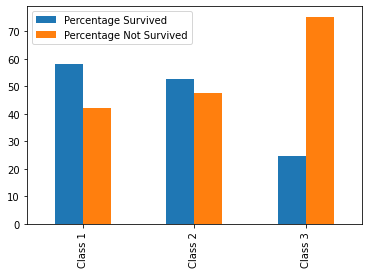

In [11]:
pclass_1_survivor_distribution = round((train[train.Pclass == 1].Survived == 1).value_counts()[1]/len(train[train.Pclass == 1]) * 100, 2)
pclass_2_survivor_distribution = round((train[train.Pclass == 2].Survived == 1).value_counts()[1]/len(train[train.Pclass == 2]) * 100, 2)
pclass_3_survivor_distribution = round((train[train.Pclass == 3].Survived == 1).value_counts()[1]/len(train[train.Pclass == 3]) * 100, 2)
pclass_perc_df = pd.DataFrame(
    { "Percentage Survived":{"Class 1": pclass_1_survivor_distribution,"Class 2": pclass_2_survivor_distribution, "Class 3": pclass_3_survivor_distribution},  
     "Percentage Not Survived":{"Class 1": 100-pclass_1_survivor_distribution,"Class 2": 100-pclass_2_survivor_distribution, "Class 3": 100-pclass_3_survivor_distribution}})

pclass_perc_df.plot.bar()
#количество выживших в зависимости от класса. Более подробный график

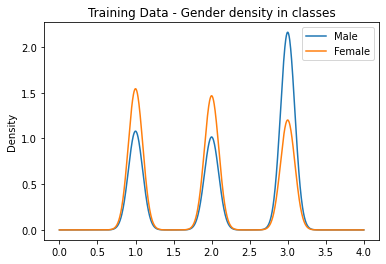

In [12]:
#Распределение людей по классам
for x in ["male","female"]:
    train.Pclass[train.Sex == x].plot(kind="kde")
plt.title("Training Data - Gender density in classes")
plt.legend(("Male","Female"))

<AxesSubplot:xlabel='Age', ylabel='Survived'>

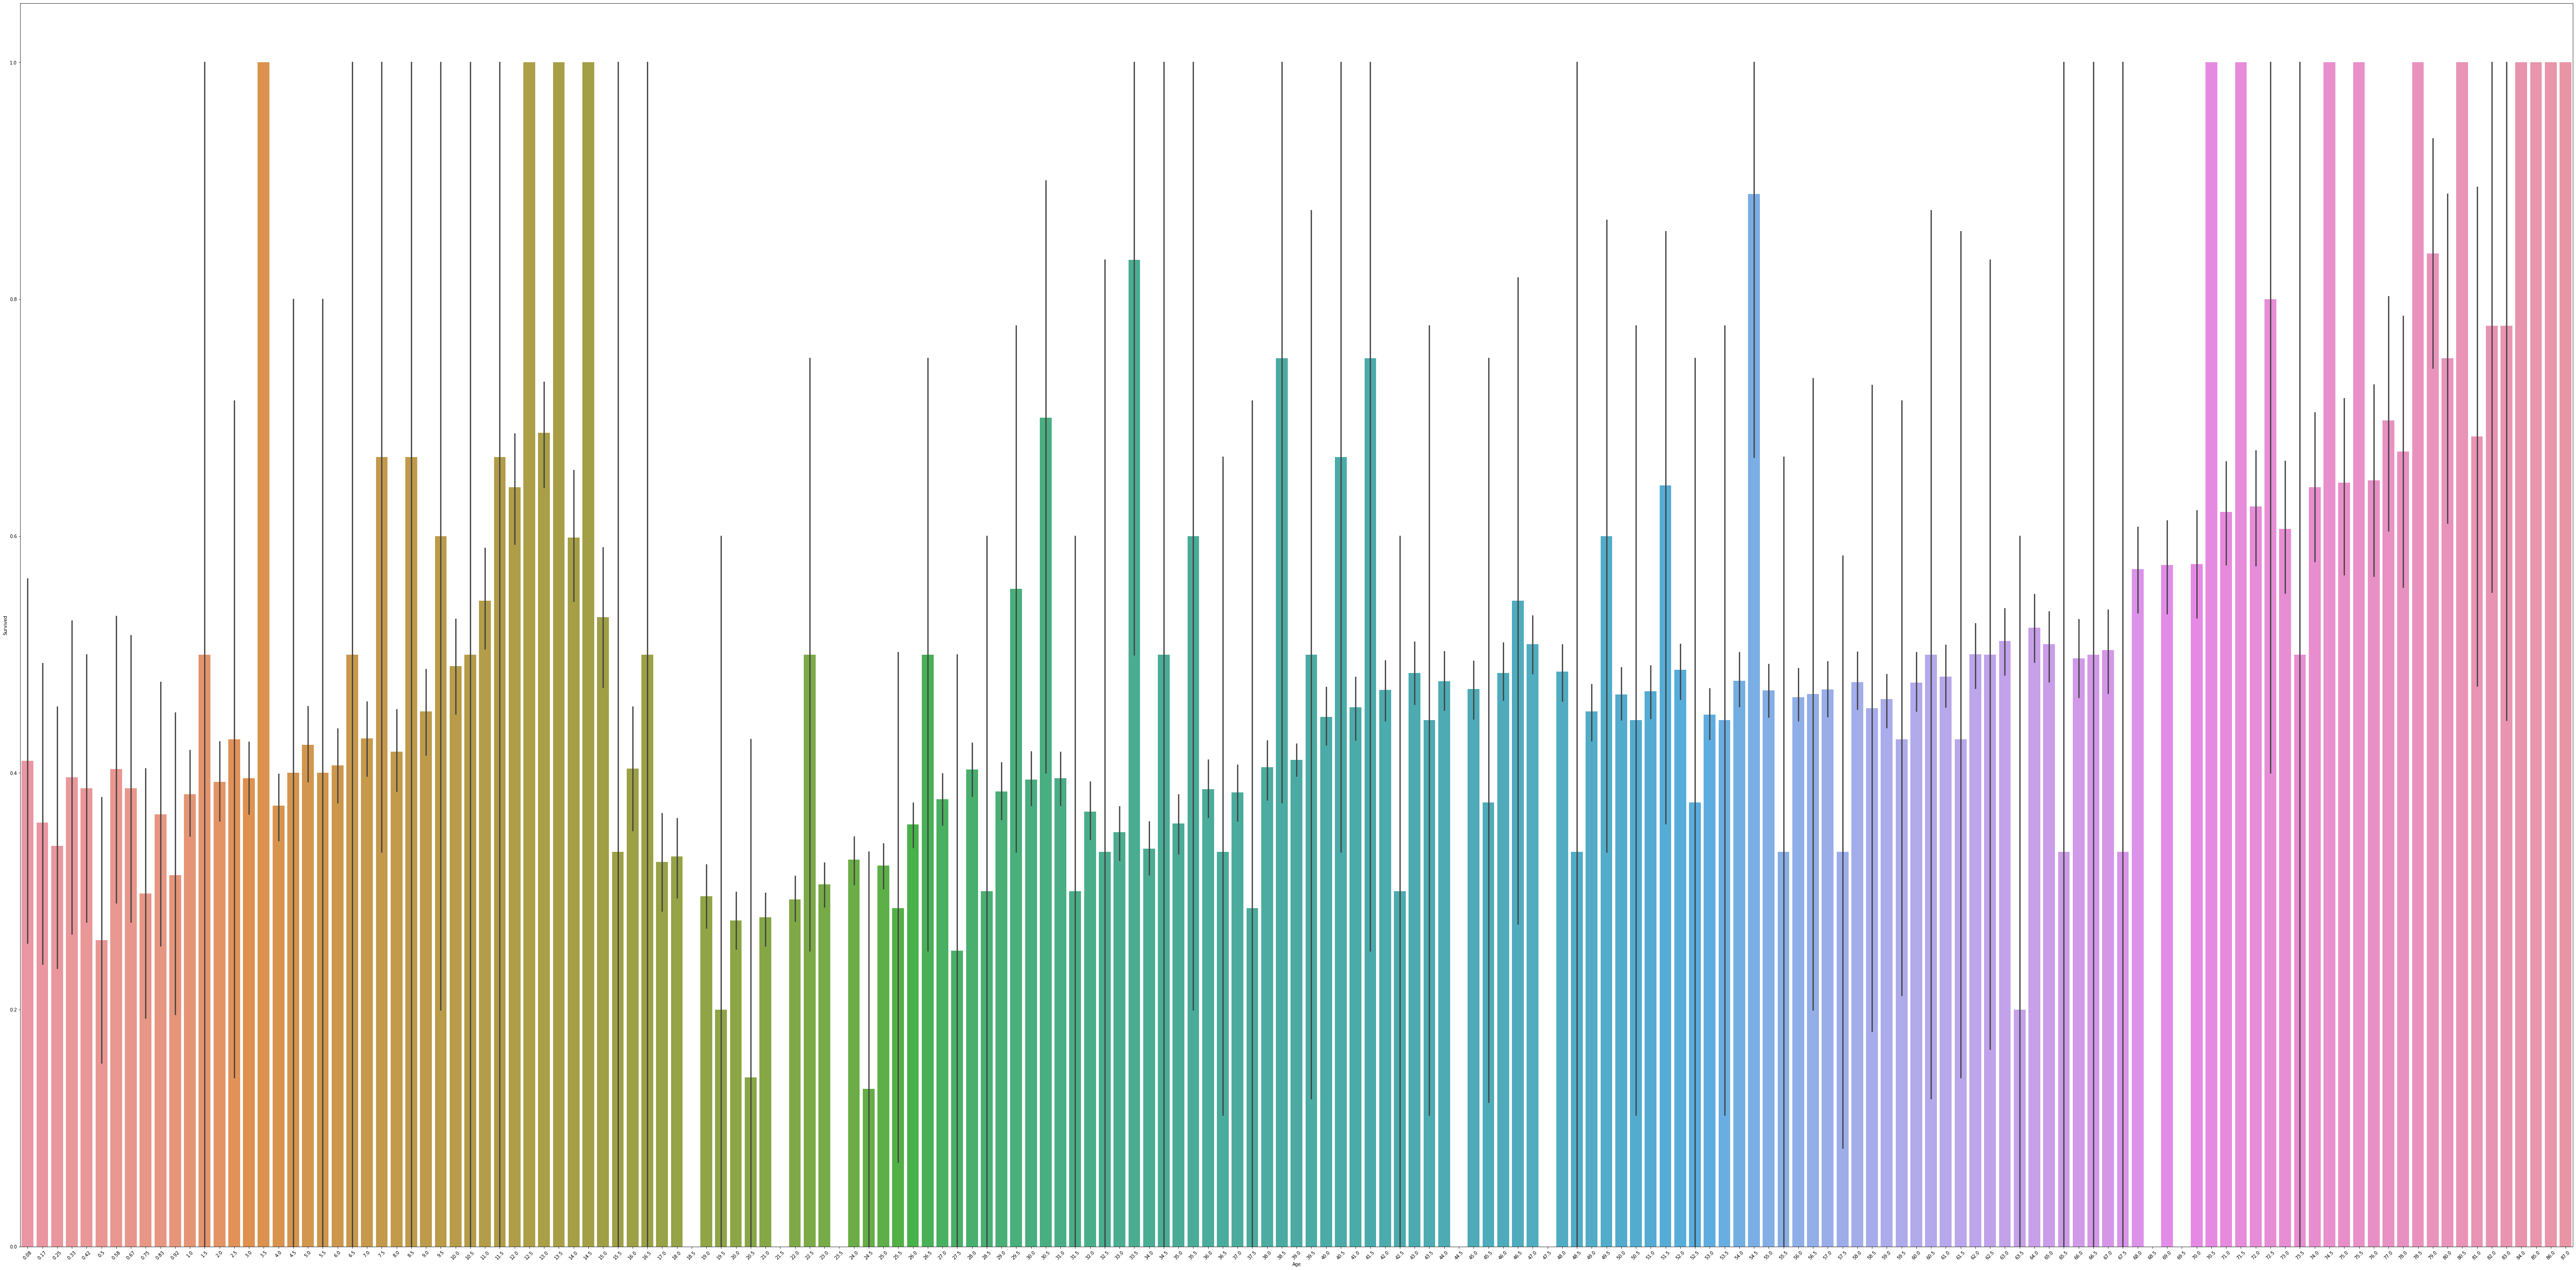

In [13]:
#кол-во выживших в зависимости от возраста со значениями, которые заменили

fig, ax = plt.subplots(figsize=(100,50))
plt.xticks(rotation=45)
sns.barplot(x='Age', y='Survived',data=train)

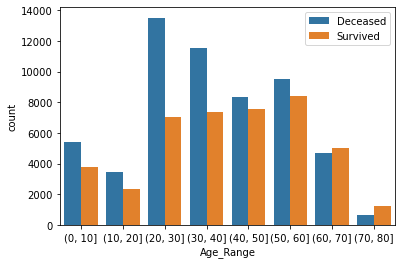

In [14]:
#Другой график. Скорее всего, более правильный. Добавили новый столбик и построили граф
train['Age_Range'] = pd.cut(train.Age, [0, 10, 20, 30, 40, 50, 60,70,80])
sns.countplot(x = "Age_Range", hue = "Survived", data = train).legend(labels = ["Deceased", "Survived"])

In [15]:
#Создаем копию от первого списка с пропусками значений и удаляем их
#train_copy_2 = train.copy
#df_common_fin = df_common_fin.dropna(axis='index', how='any', subset=['filename'])
#список без Nan
#df_common_fin = df_common_fin.dropna(axis='index', how='any', subset=['filename'])
train_copy_no_nan = train.dropna(axis='index', how='any', subset=['Age'])

<AxesSubplot:xlabel='Age', ylabel='Survived'>

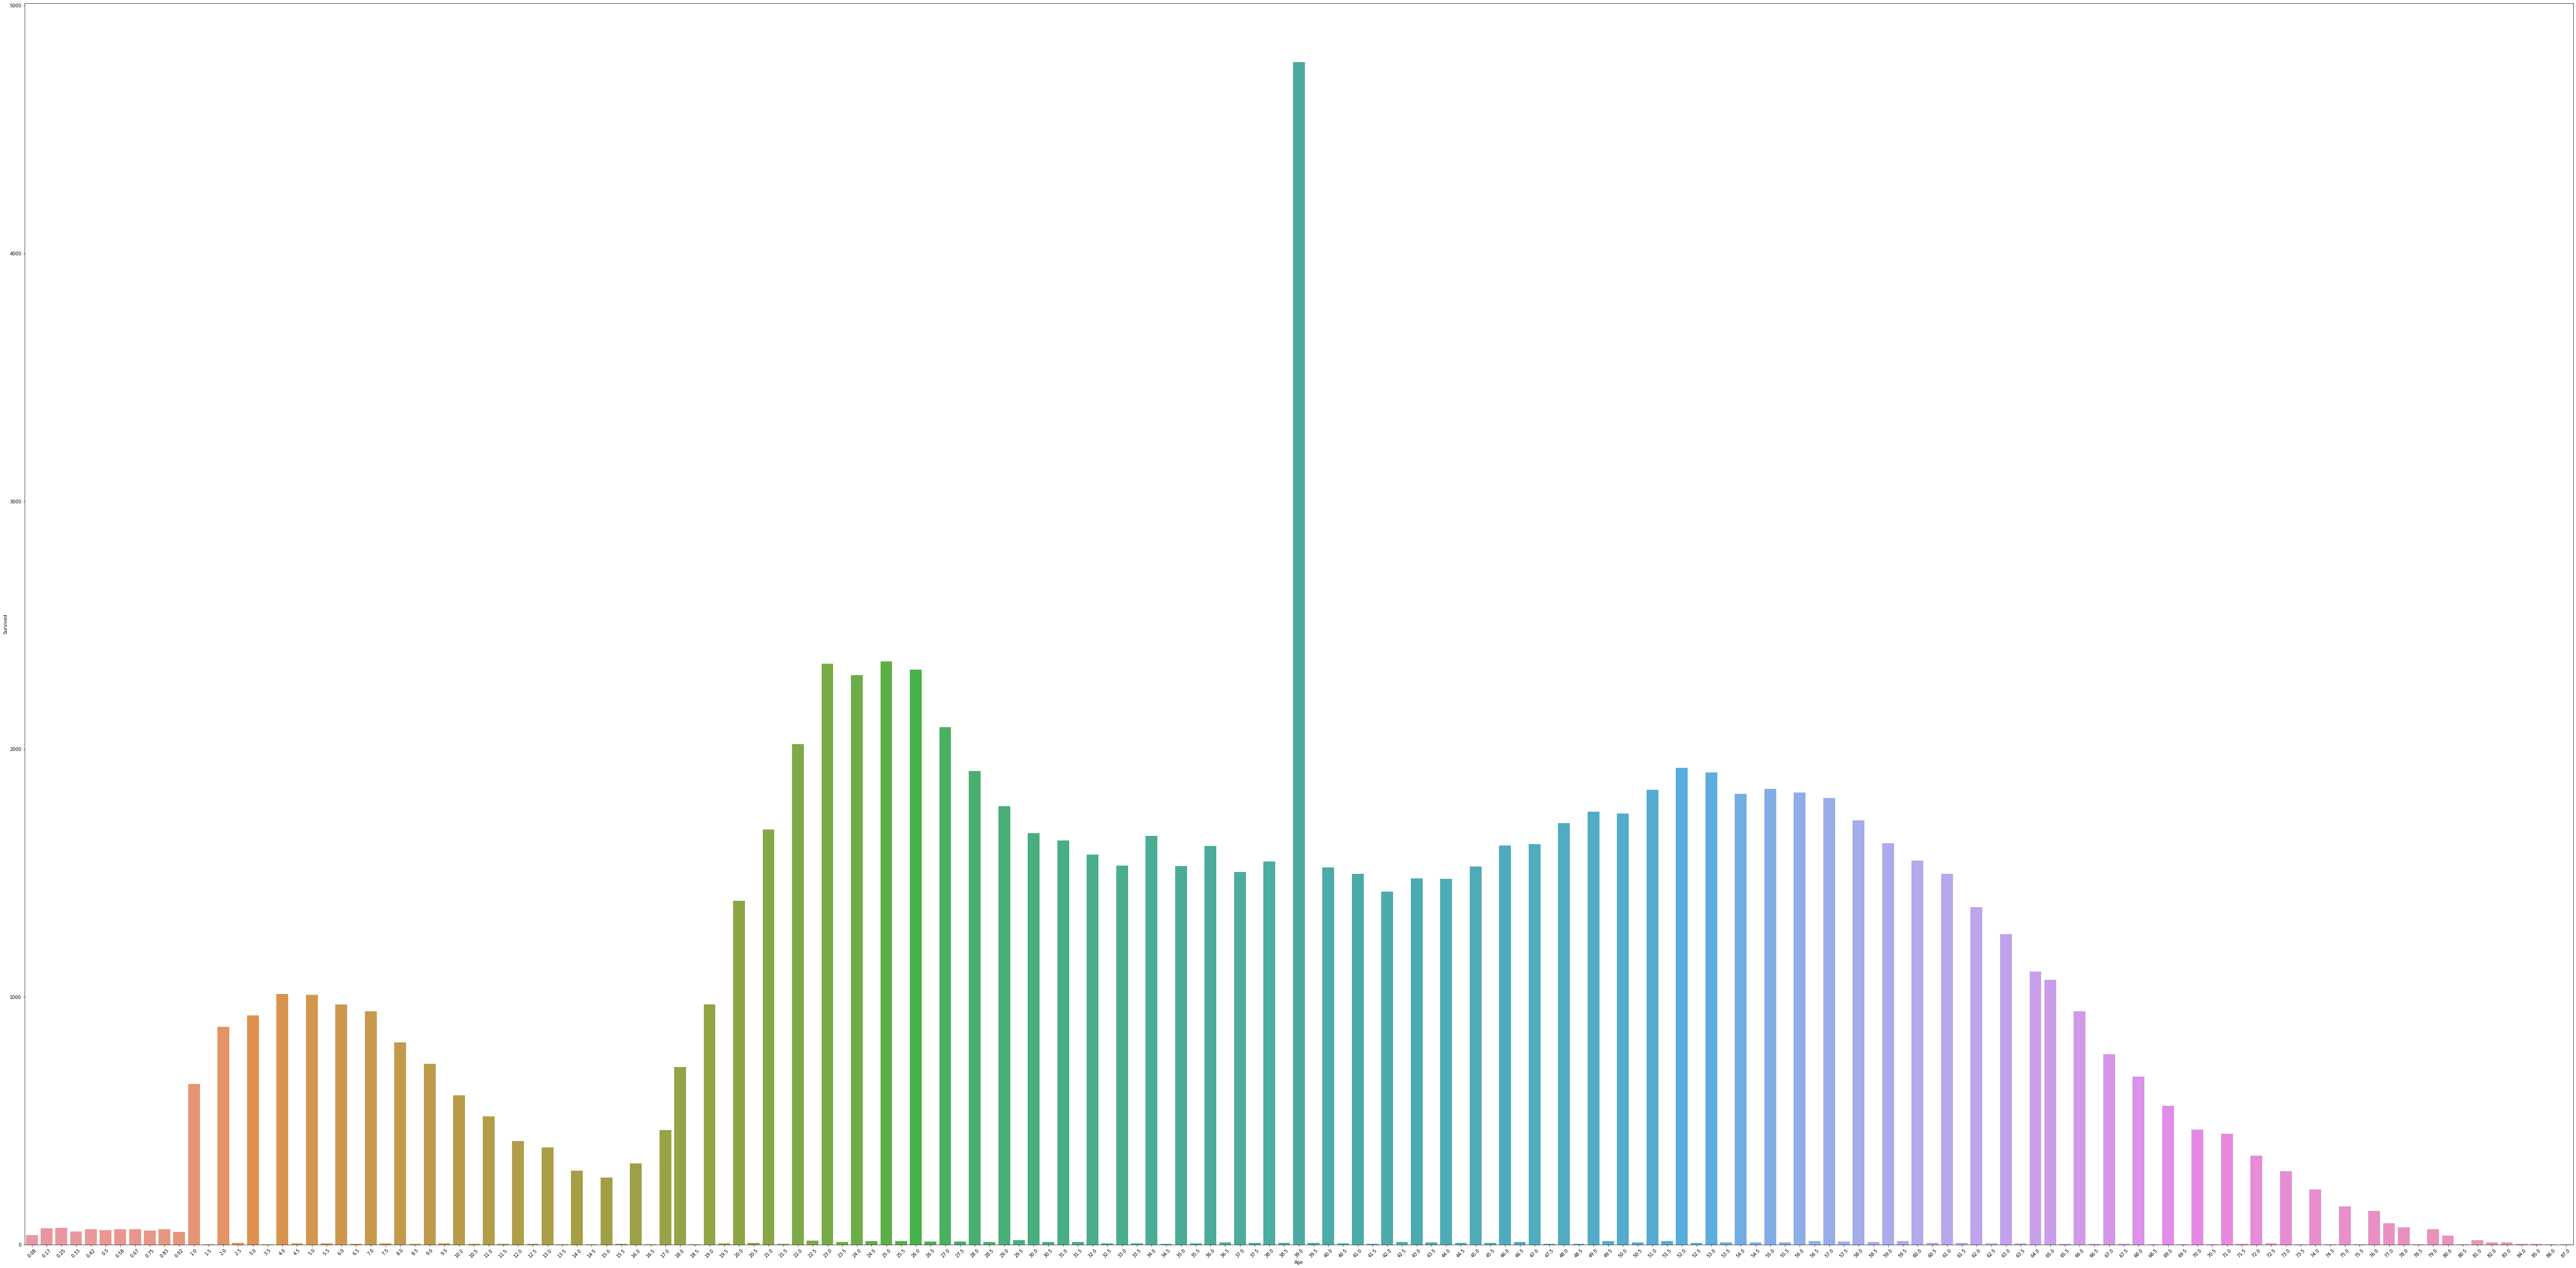

In [16]:
#группировка по возрасту
train_copy_no_nan_groups = train_copy_no_nan.groupby('Age').size().sort_values(ascending = False).reset_index()
train_copy_no_nan_groups.columns = ['Age','Survived']

#график
fig, ax = plt.subplots(figsize=(100,50))
plt.xticks(rotation=45)
sns.barplot(x='Age', y='Survived',data=train_copy_no_nan_groups)
#кол-во выживших в зависимости от возраста с дропнутыми значениями

# Summary

Вывод:
Самому младшему на борту было 0.08 лет
Самому старшему пассажиру - 87 лет
Достаточно много пропущенных значений(особенно по возрасту)
Женщин выжило больше(70%), чем мужчин(20%)
Людей из 1 класса выжило больше, чем из 2 и 3
Женщин в 1 и 2 классе было больше, чем мужчин в тех же классах и чем женщин в 3 классе
Мужчин в 3 классе было больше, чем в остальных(и больше чем женщин)
Большинство погибших в возрасте от 20 до 40 лет